#  Analyzing the Heart conditions and Predicting the Heart Failure using some  Machine Learning Algorithms.
---
---

### _Significant changes have been noted in the structure and function of the cardiovascular system in older people that are considered to be the result of aging. These changes can be regarded as either adaptive or early preclinical disease, but they occur in the absence of clinically manifest dysfunction.<br> Age-related changes are influenced by the presence of cardiovascular disease; therefore in order to study the effects of age on the cardiovascular system, individuals without subclinical or overt disease need to be identified. <br>Given the high prevalence of coronary artery disease in this population, careful screening is required and invasive tests such as coronary angiography may be necessary_

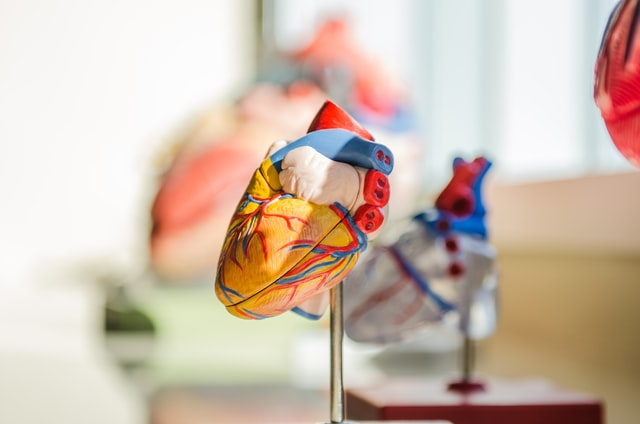

### _Despite the advancement in medicine, management of heart failure, which usually presents as a disease syndrome, has been a challenge to healthcare providers. This is reflected by the relatively higher rate of readmissions along with increased mortality and morbidity associated with HF_

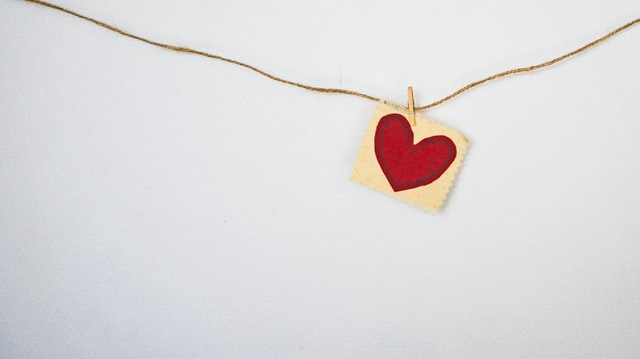

### _Heart failure is a chronic and progressive clinical syndrome induced by structural or functional cardiac abnormalities displaying either reduced (in HF with reduced ejection fraction (HFrEF)) or preserved (in HF with preserved ejection fraction (HFpEF)) left ventricular ejection fraction (LVEF)1. Cardiac dysfunction leads to elevated cardiac filling pressures at rest and during stress. HF symptoms include dyspnoea (shortness of breath) and fatigue, often accompanied by typical physical signs, such as pulmonary rales (abnormal crackling sounds), peripheral oedema or distended jugular veins._

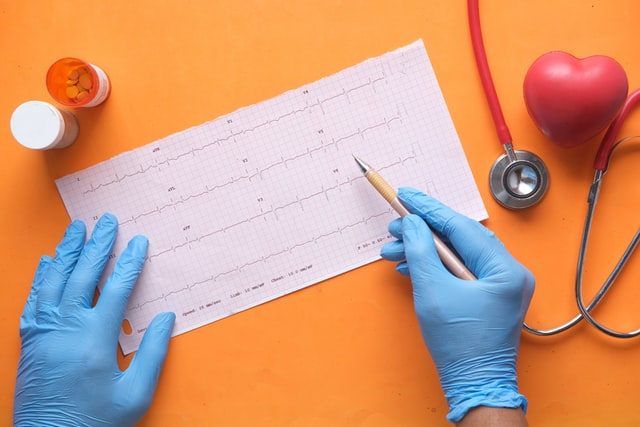

### _Heart failure is not a single pathological diagnosis, but a clinical syndrome consisting of cardinal symptoms (e.g. breathlessness, ankle swelling, and fatigue) that may be accompanied by signs (e.g. elevated jugular venous pressure, pulmonary crackles, and peripheral oedema). It is due to a structural and/or functional abnormality of the heart that results in elevated intracardiac pressures and/or inadequate cardiac output at rest and/or during exercise._

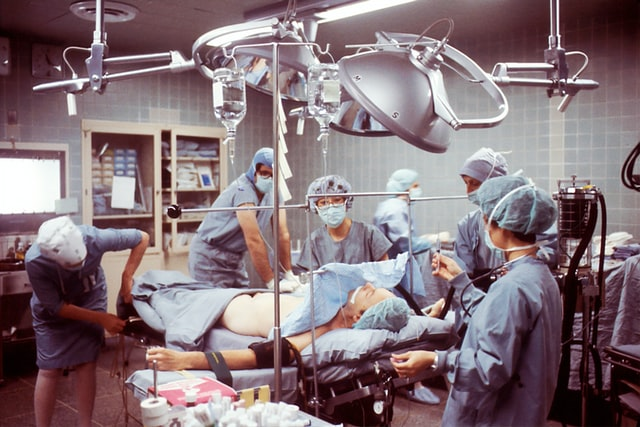

---
---
---
# _Importing Libraries_

In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# _Reading the Dataset_ 

In [36]:
df = pd.read_csv('heart condition failure data.csv')

In [37]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# _Checking for the Null values_

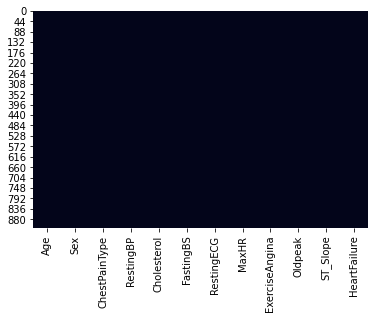

In [13]:
sns.heatmap(df.isnull(), cbar=False, cmap = 'rocket')

### _Alright, no null values to take care of._
---

# _Exploratory data analysis and visualization:_

In [14]:
df.shape

(918, 12)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartFailure,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


## _Using Correlation to plot a Heatmap_

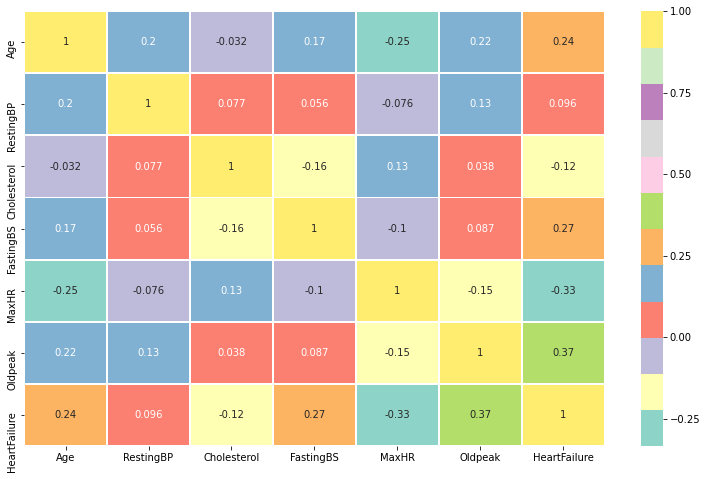

In [18]:
corr = df.corr(method='kendall')
plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True, cmap="Set3", linewidths=.9)

---

## _Now, Visualizing-_

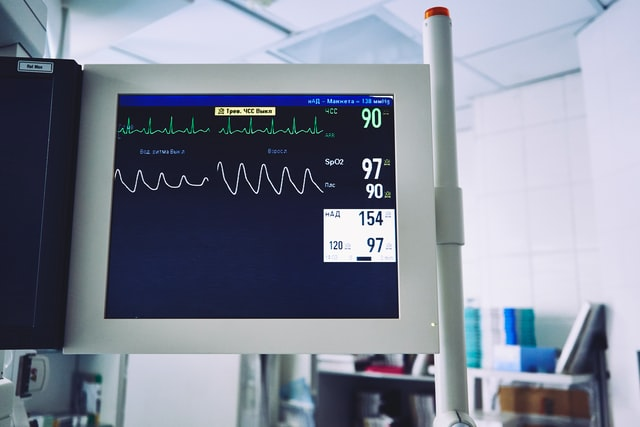

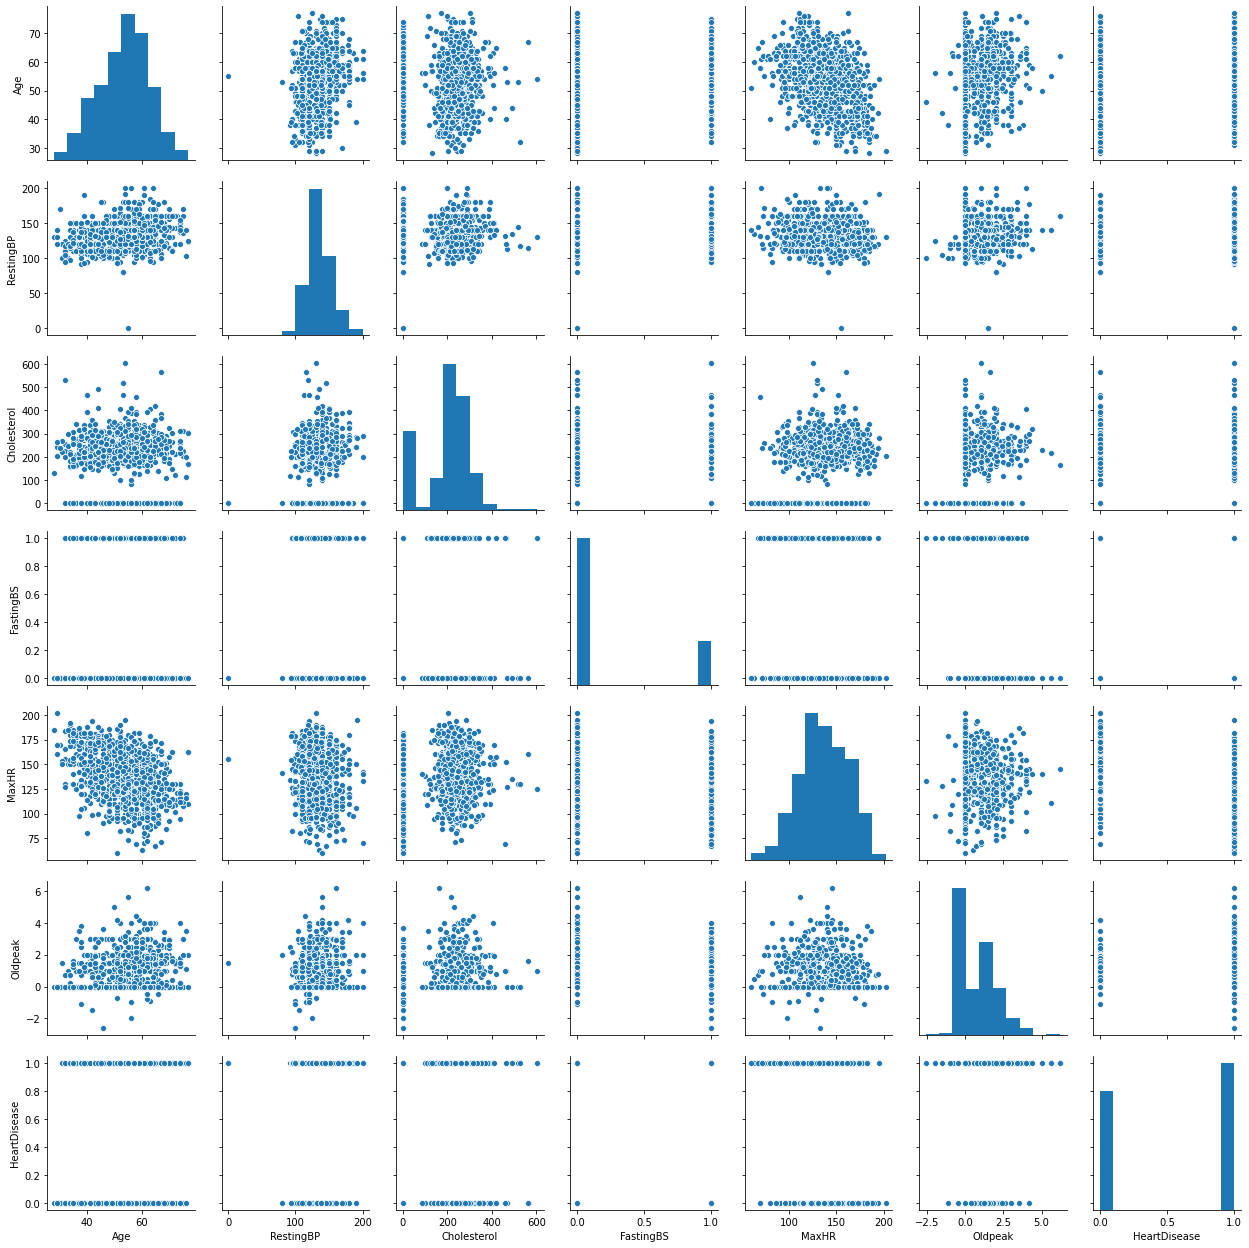

In [39]:
sns.pairplot(df);

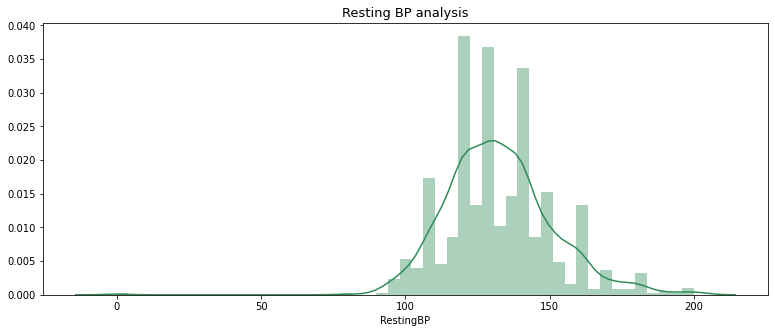

In [80]:
plt.figure(figsize=(13,5))
sns.distplot(df['RestingBP'], color = 'seagreen')
plt.title('Resting BP analysis', size = 13)
plt.show()

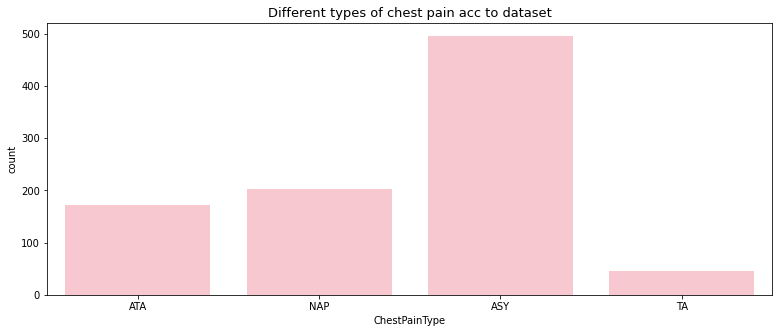

In [50]:
plt.figure(figsize=(13,5))
sns.countplot(df['ChestPainType'], color = 'pink')
plt.title('Different types of chest pain acc to dataset', size = 13)
plt.show()

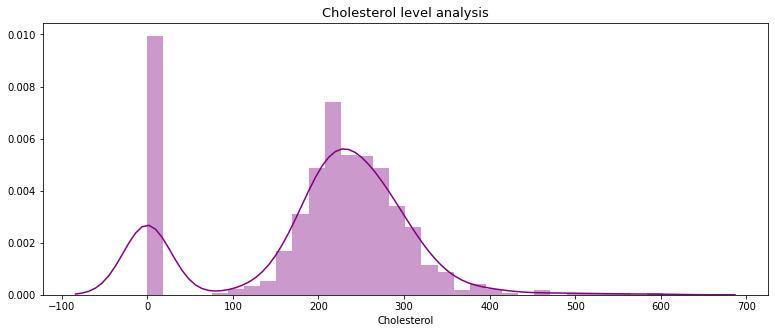

In [48]:
plt.figure(figsize=(13,5))
sns.distplot(df['Cholesterol'], color = 'purple')
plt.title('Cholesterol level analysis', size = 13)
plt.show()

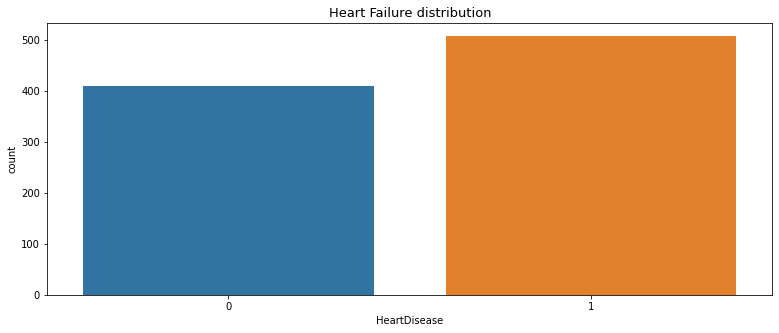

In [62]:
plt.figure(figsize=(13,5))
sns.countplot(df['HeartDisease'], palette = 'tab10')
plt.title('Heart Failure distribution', size = 13)
plt.show()

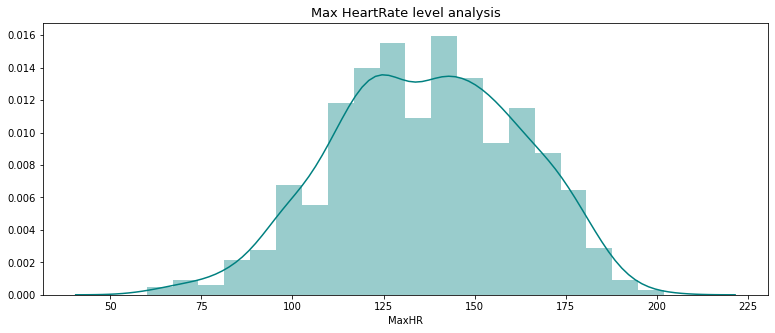

In [79]:
plt.figure(figsize=(13,5))
sns.distplot(df['MaxHR'], color = 'teal')
plt.title('Max HeartRate level analysis', size = 13)
plt.show()

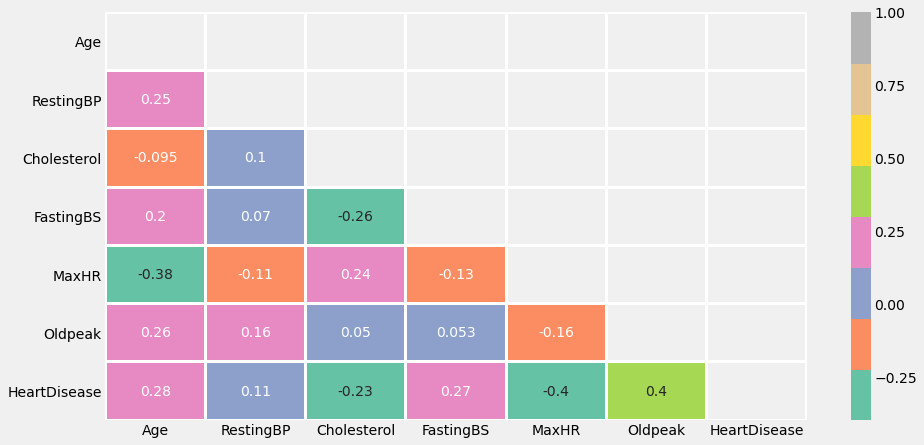

In [94]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), mask=np.triu(df.corr()), annot=True, cmap='Set2',linewidth=2)
plt.show()

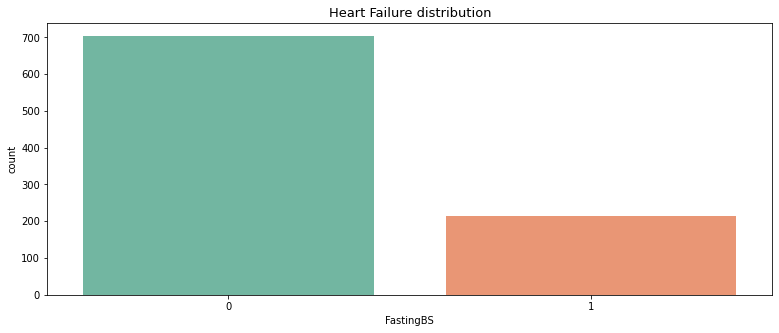

In [67]:
plt.figure(figsize=(13,5))
sns.countplot(df['FastingBS'], palette = 'Set2')
plt.title('Heart Failure distribution', size = 13)
plt.show()

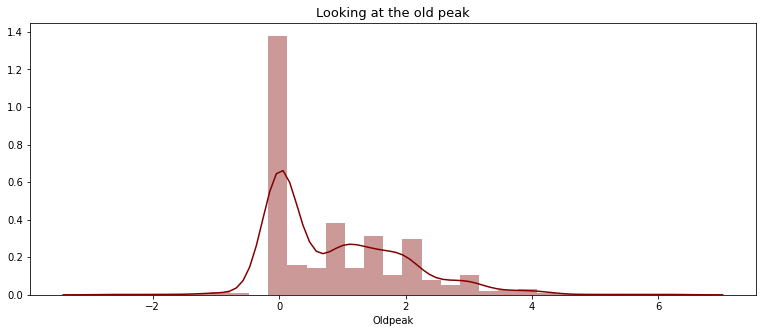

In [77]:
plt.figure(figsize=(13,5))
sns.distplot(df['Oldpeak'], color = 'maroon')
plt.title('Looking at the old peak', size = 13)
plt.show()

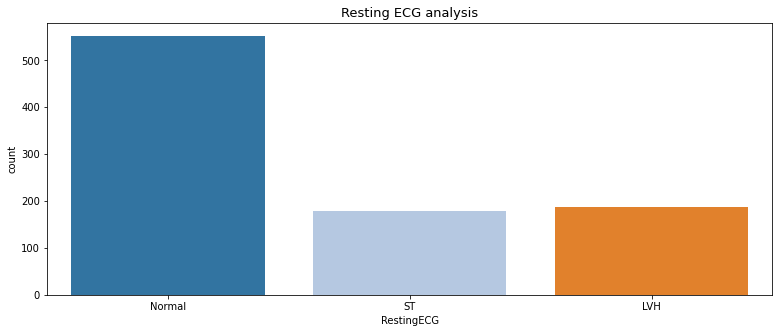

In [74]:
plt.figure(figsize=(13,5))
sns.countplot(df['RestingECG'],palette='tab20')
plt.title('Resting ECG analysis', size = 13)
plt.show()

### _Discrete and Continuous Features_

In [81]:
discrette_feature = [i for i in df.columns if df[i].nunique() < 10]
continuous_feature = [i for i in df.columns if df[i].nunique() > 10]

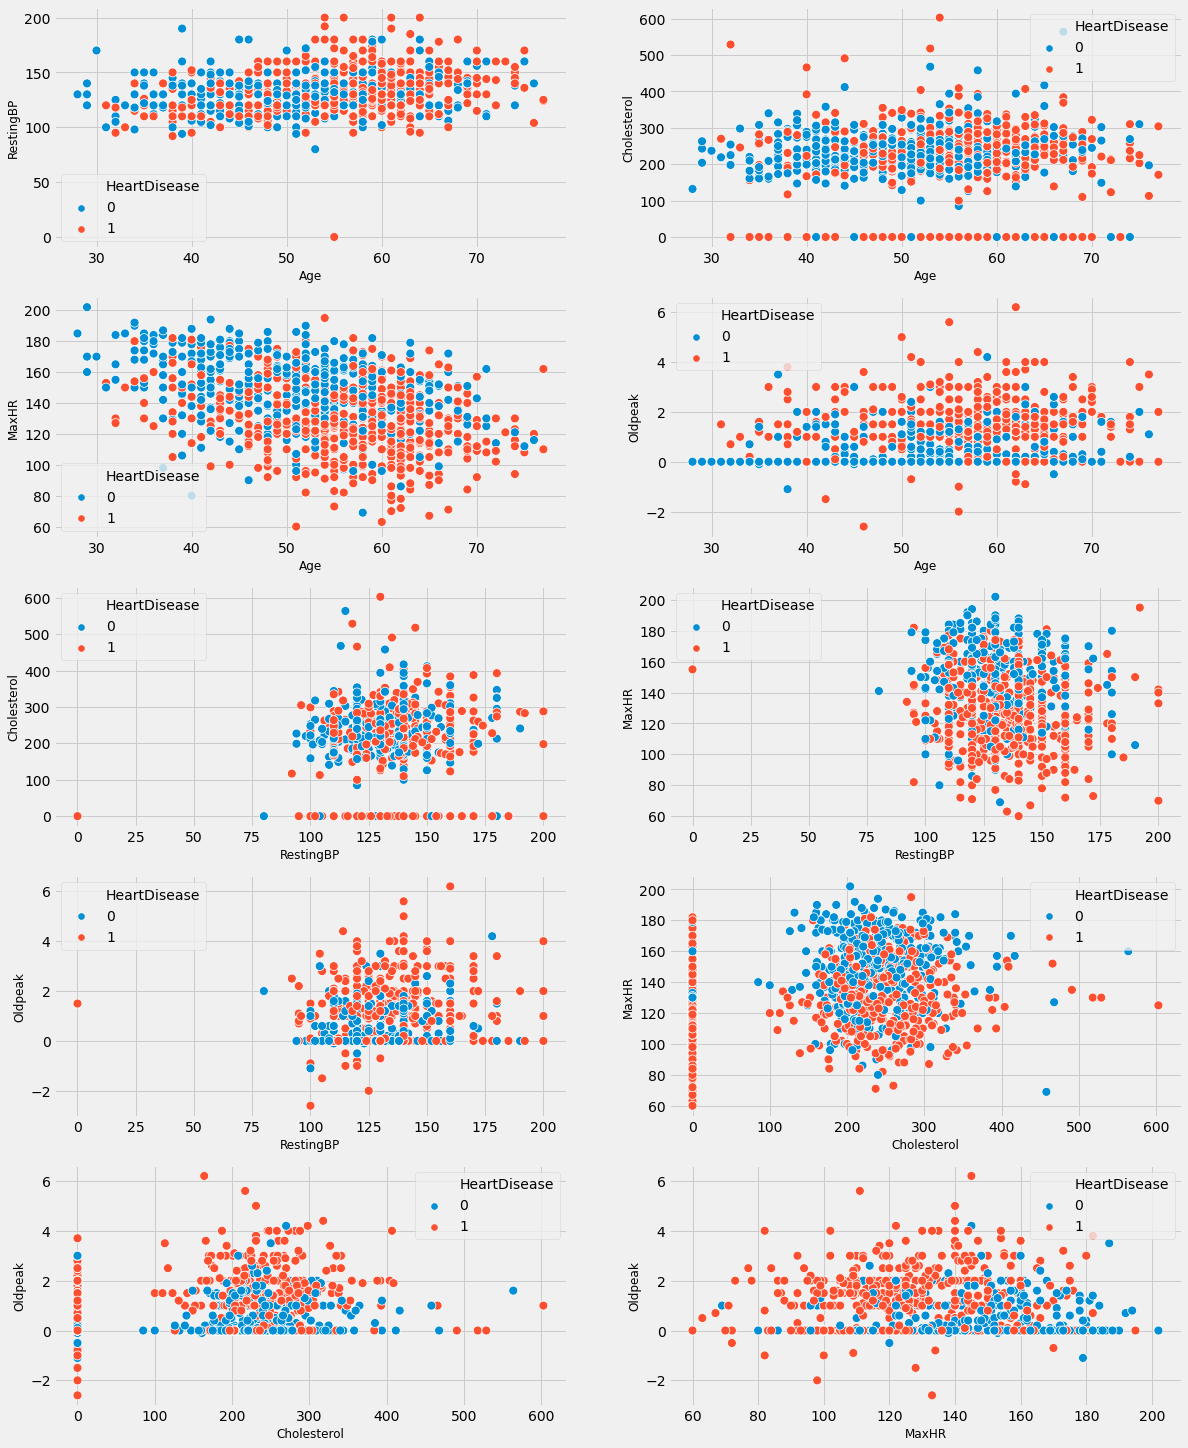

In [90]:
i = 1
n = 1
plt.figure(figsize=(18,24)) 
for feature in continuous_feature:
    for i_ in continuous_feature[n:]:
        plt.subplot(5, 2, i)
        sns.scatterplot(x=df[feature],y=df[i_], s=80, hue=df.HeartDisease)
        plt.xlabel(feature,size=12)
        plt.ylabel(i_,size=12)
        i += 1
    n+=1
plt.show()   

---
---
---

# Making the Model

In [95]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# _Independent and dependent features_

In [96]:
X = df.drop(columns=['HeartDisease'])

In [97]:
y = df['HeartDisease']

In [98]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

# _Train-Test split_

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

---
# Scaling the Train and Test datasets

---
## _Using One-Hot Encoding and Standard Scalar_

In [101]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [102]:
transformer = ColumnTransformer(transformers = [('onehot', OneHotEncoder(sparse=False, drop='first'), [1,2,6,8,10]),
                                                ('scaler', StandardScaler(), [0,3,4,5,7,9])],remainder = 'passthrough')


In [103]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

---
---
# _Now, Model will be Trained_
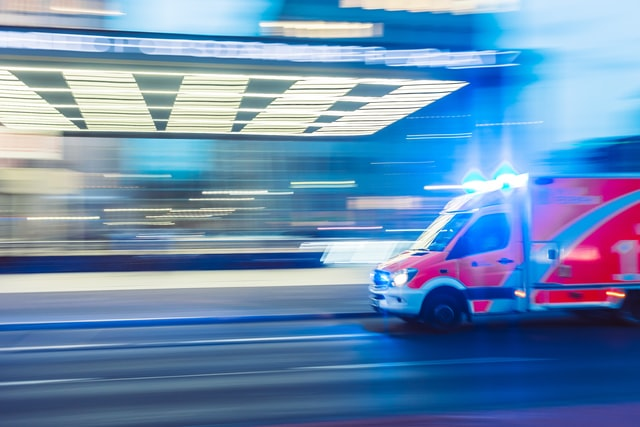

# _Using Logistic Regression_

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
lg = LogisticRegression()

In [107]:
lreg_model =lg.fit(X_train,y_train)

In [108]:
y_pred_lg = lreg_model.predict(X_test)

### _Accuracy of Logistic Regression model_

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, y_pred_lg)

0.8369565217391305

### _Classification report_

In [110]:
 print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        84
           1       0.84      0.86      0.85       100

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184



### _Confusion Matrix logisticRegression_

In [111]:
conflg= confusion_matrix(y_test, y_pred_lg)
conflg

array([[68, 16],
       [14, 86]], dtype=int64)

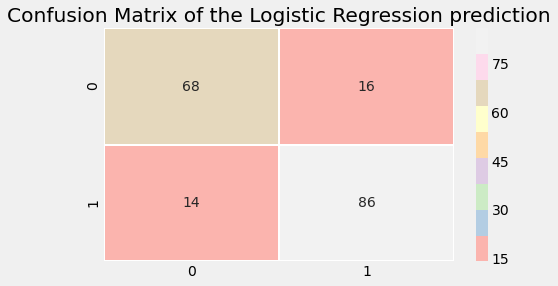

In [112]:
plt.figure(figsize=(7,4))
sns.heatmap(conflg, annot=True, cmap="Pastel1", linewidths=.9, fmt='d')
plt.title('Confusion Matrix of the Logistic Regression prediction')
plt.show()

---
---
---
# _Using Random Forest Classifier_
---

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rfc= RandomForestClassifier(n_estimators=8)

In [115]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [116]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

### _Accuracy of Randomforest_

In [118]:
accuracy_rfc = accuracy_score(y_pred, y_test)
accuracy_rfc

0.842391304347826

### _Classification Report_

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        84
           1       0.87      0.84      0.85       100

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



### _Confusion Matrix RandomForest_

In [125]:
confrfc= confusion_matrix(y_test, y_pred)
confrfc

array([[71, 13],
       [16, 84]], dtype=int64)

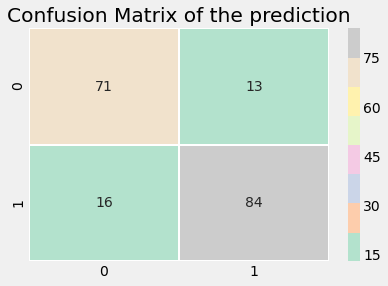

In [126]:
sns.heatmap(confrfc, annot=True, cmap="Pastel2", linewidths=.9, fmt='d')
plt.title('Confusion Matrix of the prediction')
plt.show()

---
---
---
# _Using Support Vector Machine_
---

In [151]:
from sklearn.svm import SVC

In [133]:
svc = SVC()
svc_model = svc.fit(X_train, y_train)

In [134]:
svc_pred = svc_model.predict(X_test)

### _Accuracy of SVM_

In [135]:
accuracy_score(y_test, svc_pred)

0.8641304347826086

### _Classification Report_

In [136]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        84
           1       0.86      0.89      0.88       100

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



### _Confusion Matrix SVM_

In [137]:
confsvm= confusion_matrix(y_test, svc_pred)
confsvm

array([[70, 14],
       [11, 89]], dtype=int64)

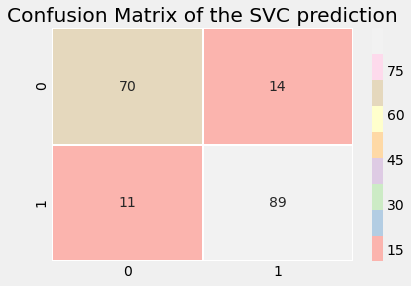

In [139]:
sns.heatmap(confsvm, annot=True, cmap="Pastel1", linewidths=.9, fmt='d')
plt.title('Confusion Matrix of the SVC prediction')
plt.show()

---
---
---
# _Using ADAboost Classifier_
---

In [152]:
from sklearn.ensemble import AdaBoostClassifier

In [154]:
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(X_train,y_train)
adb_pred = adb.predict(X_test)

### _Accuracy of ADAboost_

In [155]:
accuracy_score(y_test, adb_pred)

0.8478260869565217

### _Classification Report_

In [156]:
 print(classification_report(y_test, adb_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        84
           1       0.87      0.85      0.86       100

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



### _Confusion Matrix ADAboost_

In [157]:
confadb= confusion_matrix(y_test, adb_pred)
confadb

array([[71, 13],
       [15, 85]], dtype=int64)

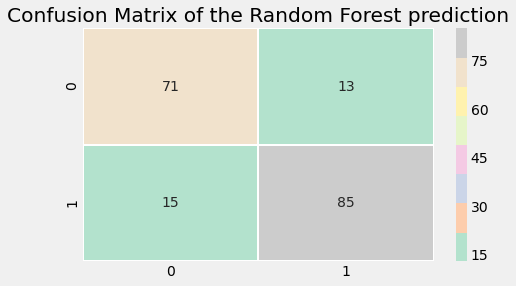

In [161]:
plt.figure(figsize=(7,4))
sns.heatmap(confadb, annot=True, cmap="Pastel2", linewidths=.9, fmt='d')
plt.title('Confusion Matrix of the Random Forest prediction')
plt.show()

---
---
---
## _And now,_


---

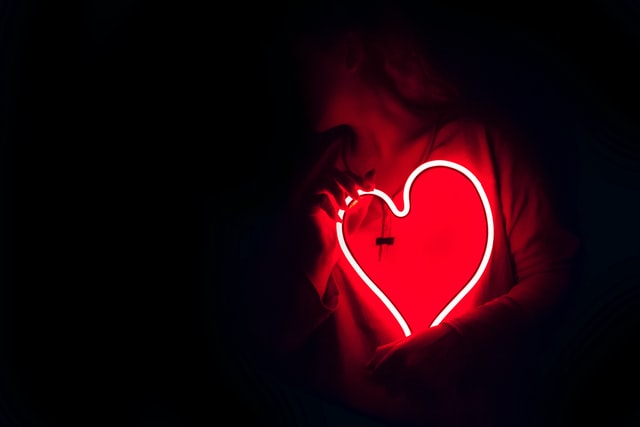

# _C O N C L U S I O N:_

---

## _I have done Analysis as well as visualization of the Dataset._

## _And I have Trained the model using:_

- ### _Logistic Regression_
- ### _Random Forest Classifier_
- ### _Support Vector Machine_
- ### _ADAboost Classifier_


##### And now, 

## _From the above 4 trained Models, It can be seen that <br><br>the Support Vector Machine Classification model performed better than the rest of the other models !_
---